In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('ifood_df.csv')

1) **Data Collection: Obtain a dataset containing customer information, purchase history, and
relevant data.**

In [4]:
# Basic exploration
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [5]:
print(df.describe())


              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000 

In [6]:
print(df.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

2. **Data Exploration and Cleaning: Explore the dataset, understand its structure, and handle
any missing or inconsistent data.**

In [8]:
# Handle missing values
df = df.dropna()  # Drop rows with missing values

In [9]:
# Remove duplicates
df = df.drop_duplicates()

In [10]:
print(df.columns)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


3. **Descriptive Statistics: Calculate key metrics such as average purchase value, frequency of
purchases, etc.**

In [12]:
average_purchase_value = df['MntTotal'].mean()
purchase_frequency = df.groupby('Customer_Days').size()

In [13]:
print(f'Average Purchase Value: {average_purchase_value}')
print(f'Purchase Frequency: {purchase_frequency}')

Average Purchase Value: 563.789213260762
Purchase Frequency: Customer_Days
2159    2
2160    3
2161    3
2162    3
2163    4
       ..
2854    5
2855    3
2856    4
2857    1
2858    1
Length: 662, dtype: int64


4. ***Customer Segmentation: Utilize clustering algorithms (e.g., K-means) to segment
customers based on behavior and purchase patterns.***

In [15]:
# Select features for clustering
features = df[['MntTotal', 'NumDealsPurchases', 'NumWebPurchases', 'NumStorePurchases']]

In [16]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['segment'] = kmeans.fit_predict(features)

In [17]:
# Add cluster labels to the DataFrame
print(df.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Widow  \
0              172                88            88  ...              0   
1                2                 1             6  ...              0   
2              111                21            42  ...              0   
3               10                 3             5  ...              0   
4               46                27            15  ...              0   

   education_2n Cycle  education_Basic  education_Graduation  \
0         

5. **Visualization: Create visualizations (e.g., scatter plots, bar charts) to illustrate customer
segments.**

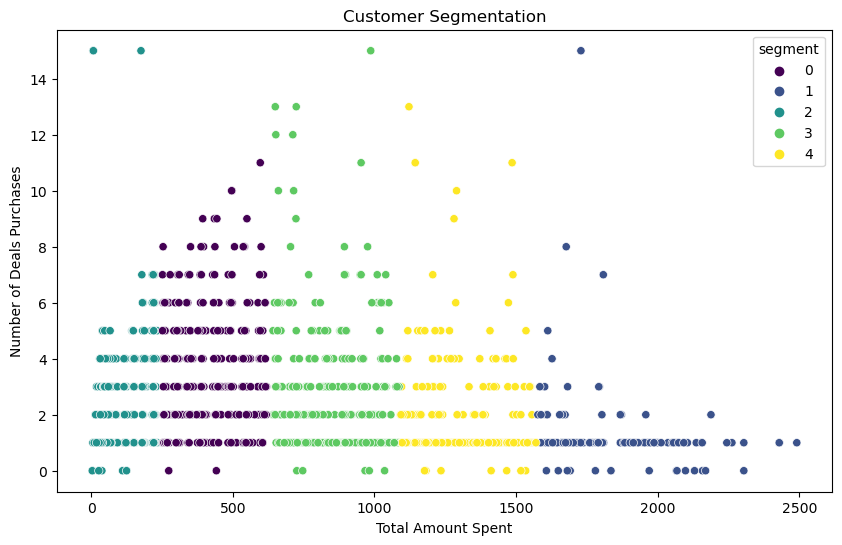

In [19]:
# Scatter plot of customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MntTotal', y='NumDealsPurchases', hue='segment', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Deals Purchases')
plt.show()

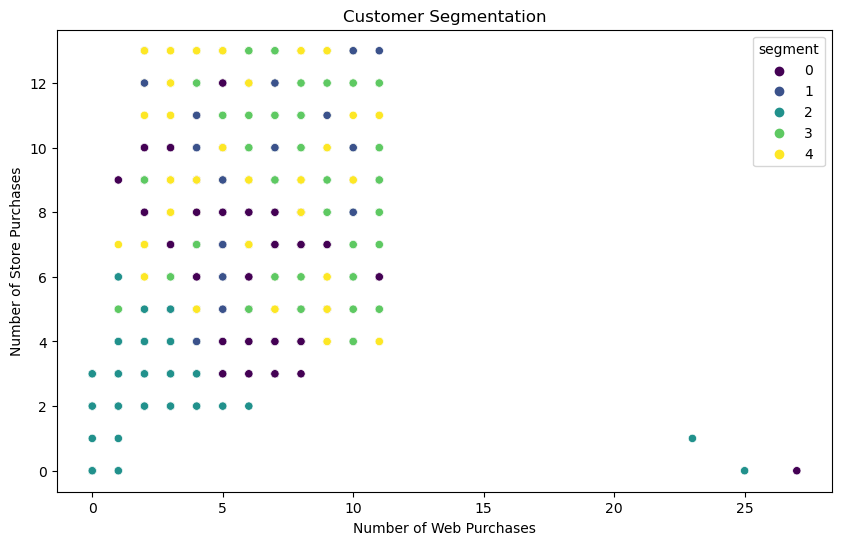

In [20]:
# Additional scatter plot for another feature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebPurchases', y='NumStorePurchases', hue='segment', data=df, palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Number of Store Purchases')
plt.show()

In [21]:
# Define threshold value based on the mean of 'MntTotal'
threshold_value = df['MntTotal'].mean()
print(f'Threshold Value (Mean of MntTotal): {threshold_value}')

Threshold Value (Mean of MntTotal): 563.789213260762


6. **Insights and Recommendations: Analyze characteristics of each segment and provide
insights.**

In [23]:
for segment in df['segment'].unique():
    segment_data = df[df['segment'] == segment]
    print(f'Segment {segment} Insights:')
    print(f'Average Total Spent: {segment_data["MntTotal"].mean()}')
    print(f'Average Number of Deals Purchases: {segment_data["NumDealsPurchases"].mean()}')
    print(f'Average Number of Web Purchases: {segment_data["NumWebPurchases"].mean()}')
    print(f'Average Number of Store Purchases: {segment_data["NumStorePurchases"].mean()}\n')

    # Provide recommendations
    if segment_data["MntTotal"].mean() > threshold_value:
        print(f'Recommendation for Segment {segment}: Target this segment with premium products and personalized offers.')
    else:
        print(f'Recommendation for Segment {segment}: Encourage this segment with discounts and loyalty programs.')

Segment 4 Insights:
Average Total Spent: 1308.1094339622641
Average Number of Deals Purchases: 1.8943396226415095
Average Number of Web Purchases: 5.539622641509434
Average Number of Store Purchases: 8.550943396226415

Recommendation for Segment 4: Target this segment with premium products and personalized offers.
Segment 2 Insights:
Average Total Spent: 69.23755656108597
Average Number of Deals Purchases: 2.021493212669683
Average Number of Web Purchases: 2.004524886877828
Average Number of Store Purchases: 3.090497737556561

Recommendation for Segment 2: Encourage this segment with discounts and loyalty programs.
Segment 3 Insights:
Average Total Spent: 864.8465909090909
Average Number of Deals Purchases: 2.647727272727273
Average Number of Web Purchases: 6.167613636363637
Average Number of Store Purchases: 8.892045454545455

Recommendation for Segment 3: Target this segment with premium products and personalized offers.
Segment 0 Insights:
Average Total Spent: 409.0945945945946
Aver